# 2  数据处理与探索
数据探索是在数据科学中很重要的步骤，也是可视化中的关键一环。

数据探索包括数据的清洗、数据的转换。

tidyverse提供了完整的数据科学的流程，使用tidyverse可以非常方便的进行数据相关的处理。

## 2.1 数据转换
在对数据尽心可视化，对数据进行分析之前，常常需要对数据进行各种的转换，以将数据转变成为整洁的数据。tidyverse包中的子包dplyr提供了很多函数对于数据集进行各种各样的处理。dplyr是tidyverse中非常重要的一个包，在对数据进行可视化，建模之前，往往会对数据集使用dplyr包进行处理。
dplyr包有几个关键的函数，这些函数囊括了数据转换的全部功能。这些函数包括：filter，arrange，select，mutate，summarize。其中filter函数用于筛选数据的行；arrange函数用于对数据进行排序；select函数用于筛选数据的列；mutate函数用于生成新的变量。summarize函数用于计算数据的一些统计指标。

另外一个比较常用的函数式group_by函数，这个函数常常被用于对数据进行分组汇总计算。
### 2.1.1 筛选数据的行

第一个要介绍的函数是filter函数，filter函数用于筛选数据集的行，用于创建一个关于数据集的子集。filter函数的第一个参数是需要处理的数据集。第二个参数是筛选数据集的条件。

In [1]:
#install.packages("tidyverse")
require(tidyverse) # 加载相关的包



载入需要的程辑包：tidyverse

Warning message:
"程辑包'tidyverse'是用R版本4.1.2 来建造的"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

Warning message:
"程辑包'ggplot2'是用R版本4.1.2 来建造的"
Warning message:
"程辑包'readr'是用R版本4.1.2 来建造的"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()



In [2]:
iris %>% filter(Sepal.Length > 3) %>% head(3) # 筛选数据集

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


总结一下常用的逻辑判断方式：

1. ！ ：表示否等，‘!=’表示不等于
2. %in% :表示是否在某一项向量中,例如，1 %in% c(1,2,3)，返回是TRUE
3. %nin% :表示某一个值是否不再某一个向量中，例如， 1 %nin%% c(1,2,3)返回的是FALSE，需要注意的是，想要使用这个方法进行判断，需要加载Hmise包
4. & ：表示并且
5. | ：表示或者
常用的函数总结如下：

 
1. distinct : 去除重复的数据集
2. sample_frac  :根据比例对于数据集进行抽样
3. sample_n : 随机抽取一定的样本数量
4. slice ：根据数据集的行数抽取数据
5. top_n ：抽取数据集的前多少行
上述五个函数的使用方式：

distinct函数有三个参数，函数的定义形式为：```distinct(.data, ..., .keep_all = FALSE)```。第一个参数为data，表示需要处理的数据集。第二个参数是...,这是函数中的一个特殊的参数，表示将data参数之后的参数都作为参数输入，‘...’这个参数在不确定函数会输入几个参数的时候非常用用。keep_all参数用于指定是否保留所有的列。

In [3]:
tmp <- data.frame(a = c(1,1,2,3,3),b = c(2,3,4,5,5)) # 创建数据框
tmp

a,b
<dbl>,<dbl>
1,2
1,3
2,4
3,5
3,5


上面的代码中创建了一个简单的数据集，有两个变量。接下来使用distinct函数进行去重。首先根据变量a进行去除。

In [4]:
tmp %>% distinct(a) # 对于数据进行去除重复数据

a
<dbl>
1
2
3


上面的代码根据对数据集的a变量进行了去重，并且distinct函数返回了变量a去重之后的结果。如果想要返回的是根据a去重之后数据集所有变量的结果，需要制定参数.keep_all=TRUE：

In [5]:
tmp %>% distinct(a,.keep_all=TRUE) # 对数据集进行去重

a,b
<dbl>,<dbl>
1,2
2,4
3,5


上面的代码根据a变量进行了去重，去除了a变量中重复的所有行，然后将剩下的数据作为结果返回。从结果中可以看到，b变量还有重复的数据，如果想要对于多个变量进行去重，调用多次distinct函数:

In [8]:
tmp %>% distinct(a,.keep_all = T) %>% distinct(b,.keep_all = T) # 对两个变量进行去重

a,b
<dbl>,<dbl>
1,2
2,4
3,5


上面的代码分别对于a变量和b变量进行了去重，这样的话，每一个变量中都不带有重复的数据。但是还有另外另外一种情况，有一个数据集收集了人们的身份信息，包括姓名，身份证等等，如果要去重则不能单独根据姓名一个变量去重，而是姓名和身份证号码都重复了才认为是重复的。对于上面的例子，就是希望删除a变量和b变量同时一样的数据，

In [9]:
tmp %>% distinct(a,b,.keep_all=TRUE) # 对两个变量进行去重

a,b
<dbl>,<dbl>
1,2
1,3
2,4
3,5


上面的代码删除了a变量和b变量同时相同的数据。上面的代码等价于```distinct(tmp)```,默认对所有的变量进行去重。上面的方法对于数据集进行去重，几乎所有的去重要求都可以通过上面的方法实现。

另外比较常用的函数是抽样函数，当我们需要对于数据集进行取子集的时候则可以使用，这些抽样函数包括sample_n,sample_frac.sample_fra函数用于对数据集合根据比例进行抽取

In [10]:
dim(iris) # 查看数据的维度

sample_frac(tbl = iris,size = 0.2,replace = F) %>% dim() # 抽取数据 - 根据比例

[1] 150   5

[1] 30  5

上面的代码对于iris数据集进行了抽样，sample_frac函数的第一个参数是所需要抽样的数据集，第二个参数是数据集的比例大小，是0-1中间的一个数值。replace函数用于指定是否进行又放回的抽样，第四个参数是weight，默认情况下所有行的数据的权重是一样的，意味着所有数据被抽取的可能性是一样的，如果不选择默认，weight必须等于一个与输入长度相同的非负数向量。权重自动标准化为1。sample_n函数用于直接抽取数据集的行

In [12]:
sample_n(tbl = iris,size = 30,replace = F) %>% dim() # 抽取数据-根据数量

[1] 30  5

上面的代码与之前的代码是等价的，之前的代码```sample_frac(tbl = iris,size = 0.2,replace = F)```表明抽取数据集的20%的数据，也就是30条数据。后面的代码直接指定抽取30条数据。这就意味着最终两种方式都是抽取了30条数据集。

slice函数用于根据数据集的行来抽取数据，假设想要抽取数据集的前10行的数据，或者想要中间某个范围的数据，则可以使用slice函数


In [13]:
iris %>% slice(5:10) # 选取数据集合的前十行

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


上面的代码用于抽取了iris数据集中第五行到第十行的数据集.其实使用filter函数同样可以实现这样的功能。上面的代码等价于

In [14]:
iris %>% filter(row_number()<=10,row_number()>=5) # 数据筛选

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


上面的代码同样抽取了iris数据集中第五行到第十行的数据。使用了filter函数，其中row_number代表了数据集的行，通过逻辑运算选取行数小于10，大于5的行，则可以得出想要的结果。需要注意的是row_number代表数据集的行，n()代表数据集的最大行数。

最后,top_n函数会根据数据的排序来抽取数据，常常用于抽取数据集中最大的一部分数据，例如，想要抽出数据集中身高最高的前十条数据，则使用这个函数会非常的方便，下面抽取iris数据集中Sepal.Width最大的前3条数据

In [15]:
top_n(iris, 3, Sepal.Width) # 选取数据集前一部分数据

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.7,4.4,1.5,0.4,setosa
5.2,4.1,1.5,0.1,setosa
5.5,4.2,1.4,0.2,setosa


上面的代码中抽取可iris数据集中Sepal.Width最大的前三条数据。tmo_n函数第一个参数是需要处理的数据集，第二个参数是想要抽取的行数，第三个特征表明根据哪个变量进行抽取。另外，tmp_n函数也常常和group_by函数一起使用，group_by函数用于对数据进行分组。假如，想要抽取不同性别，身高最高的前三条数据，使用group_by和top_n可以非常方便的实现：

In [16]:
iris %>% group_by(Species) %>% top_n(1,Petal.Width) # 对数据进行分组

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.0,3.5,1.6,0.6,setosa
5.9,3.2,4.8,1.8,versicolor
6.3,3.3,6.0,2.5,virginica
7.2,3.6,6.1,2.5,virginica
6.7,3.3,5.7,2.5,virginica


上面的代码根据不同的物种(Species)，进行分组，然后分别抽取每个组里面Petal.Width变量最大的数据。

以上的内容是关于对数据的行进行筛选。接下来介绍对数据集的列进行处理。


### 2.1.2 筛选数据集的列
如果数据集中存在非常多的列，那么可以使用select函数可以直接筛选出需要的列。

In [17]:
iris %>% dplyr::select(Sepal.Length)  %>% head(3) # 选择变量

,Sepal.Length
,<dbl>
1,5.1
2,4.9
3,4.7


上面的代码筛选出了iris数据集中，列名为Sepal.Length的列。如果想要的并不是某些列，而是想要删除某些列，则可以在变量名前面加上一个'-'，用减号表明删除这个列

In [18]:
iris %>% dplyr::select(-Sepal.Length)  %>% head(3) # 删除某个变量，选取剩下的数据集

,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<fct>
1,3.5,1.4,0.2,setosa
2,3.0,1.4,0.2,setosa
3,3.2,1.3,0.2,setosa


上面的代码删除了Sepal.Length这一些，将剩下的数据保存下来。另外，有几个在筛选列的时候非常常用的辅助函数，这些函数包括：

1. starts_with ：匹配以某一字符串开头的行
2. ends_with ： 匹配以某一字符串结尾的行
3. contains ：用于匹配字符串
4. matches :用于匹配正则表达式

上面总结的四个函数在筛选行的时候回被经常的使用到，当我们想要以某一字符串开头的所有的列的时候，可以使用starts_with函数，例如对于iris数据集，想要筛选Petal开头的数据集:

In [19]:
iris %>% dplyr::select(starts_with("Petal")) # 选取以Petal开头的变量

Petal.Length,Petal.Width
<dbl>,<dbl>
1.4,0.2
1.4,0.2
1.3,0.2
1.5,0.2
1.4,0.2
1.7,0.4
1.4,0.3
1.5,0.2
1.4,0.2


上面的代码筛选出了以Petal开头的所有的特征。同理使用ends_with特征可以筛选出所有以某一字符串结尾的特征，例如对于iris数据集，筛选出所有以Length结尾的特征

In [20]:
iris %>% dplyr::select(ends_with("Length")) # 选取以Length结尾的变量

Sepal.Length,Petal.Length
<dbl>,<dbl>
5.1,1.4
4.9,1.4
4.7,1.3
4.6,1.5
5.0,1.4
5.4,1.7
4.6,1.4
5.0,1.5
4.4,1.4


上面的代码筛选出了iris数据集中所有以Length字符串结尾的变量。另外，如果想要筛选变量名包含某些字符的变量，则可以使用contain函数，例如，筛选出所有包含Se的变量：

In [22]:
iris %>% dplyr::select(contains(c("Se"))) # 筛选变量名包含Se的变量

Sepal.Length,Sepal.Width
<dbl>,<dbl>
5.1,3.5
4.9,3.0
4.7,3.2
4.6,3.1
5.0,3.6
5.4,3.9
4.6,3.4
5.0,3.4
4.4,2.9


上面的代码中筛选出了字符串中包含Se的变量。更普遍的情况是，想要通过正则表达式来进行匹配，这个时候则需要使用matches函数，假设要筛选出包含'.c.',这个正则表达式的变量，则可以：

In [23]:
iris %>% dplyr::select(matches('.c.')) # 通过正则表达是筛选变量

Species
<fct>
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa


上面的代码筛选出了Species，而代码中正则表达式的含义是筛选出字符串中所有包含‘c’的变量。以上是对于数据集的列进行操作。接下来介绍如果对于数据集进行排序。

### 2.1.3  数据排序以及新变量生成
对数据及进行排序是数据处理的过程中非常常见的操作。R中默认的排序函数有三个，分别是order函数，sort函数和rank函数。这里介绍对数据进行排序更友好的一种方式，是来自dplyr包中的arrange函数。函数的第一个参数为需要处理的数据集，其他的参数是需要排序的变量。下面对iris数据集根据Petal.Width特征进行排序：

In [24]:
iris %>% arrange(Petal.Width) %>% head(3) # 对数据集进行排序

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.9,3.1,1.5,0.1,setosa
2,4.8,3.0,1.4,0.1,setosa
3,4.3,3.0,1.1,0.1,setosa


上面的代码对于iris数据集进行排序，排序的特征是Petal.Width。排序的方式是升序排序。如果想要降序排序，则需要使用desc函数：

In [25]:
iris %>% arrange(desc(Petal.Width)) %>% head(3) # 对数据集进行降序排序

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6.3,3.3,6.0,2.5,virginica
2,7.2,3.6,6.1,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica


上面的代码对于iris数据集进行排序，排序的特征是Petal.Width。排序的方式是升序排序。如果想要升序排序。如果希望根据多个变量进行排序，实现的方式非常简单，只需要指定多个排序变量即可：

In [26]:
iris %>% arrange(desc(Petal.Width),Petal.Length) %>% head(3) # 对两个变量进行排序

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6.7,3.3,5.7,2.5,virginica
2,6.3,3.3,6.0,2.5,virginica
3,7.2,3.6,6.1,2.5,virginica


上面的代码根据多个变量进行排序，首先根据Petal.Width变量进行降序排序，然后根据Petal.Length变量进行升序进行排序，最后返回排序之后的数据集。

以上是关于数据探索中排序相关的操作。在数据探索中，往往还涉及到新变量的生成，例如，想要对数据进行对数转换，将转换之后的数据生成一个新的变量。这个时候需要时mutate函数，这个函数可以再原始的数据集中生成一个新的变量。例如，对iris数据集进行处理，需要计算Sepal.Length与Sepal.Width 的和，并生成一个新的变量，则可以使用mutate函数，代码如下：

In [27]:
iris %>% mutate(Sepal = Sepal.Length + Sepal.Width) %>% head(3) # 生成一个新的变量

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,8.6
2,4.9,3.0,1.4,0.2,setosa,7.9
3,4.7,3.2,1.3,0.2,setosa,7.9


上面的代码计算出来了iris数据集中Sepal.Length和Sepal.Width两个变量的和，并将和的结果生成为Sepal变量。mutate函数的使用方式很简单，变量名 = 变量的公式，设置好了之后调用mutate函数即可，最后返回的结果则会包含新生成的数据集。


### 2.1.4数据分组汇总

数据的分组也是数据探索的重要的手段，通过对数据不断地分组，可以细化数据的维度，能够更加细致的了解数据。这里对数据分组进行操作的函数是group_by函数，计算统计汇总的函数是summarise函数。首先介绍summarise函数，对于整个数据集使用summarise可以计算关于整个数据集的统计量。例如，计算iris数据集中各个特征的平均值，则可以使用summarise函数：

In [28]:
iris %>% summarise(mean(Sepal.Length),mean(Sepal.Width),mean(Petal.Length),mean(Petal.Width)) # 计算数据集的统计量

mean(Sepal.Length),mean(Sepal.Width),mean(Petal.Length),mean(Petal.Width)
<dbl>,<dbl>,<dbl>,<dbl>
5.843333,3.057333,3.758,1.199333


上面的代码中计算了iris数据集中四个连续变量的平均值。summarise函数常常与group_by函数一起使用，用于计算不同组别的统计量。例如，在iris数据集中，一共有三种不同的物种Species,如果想要计算不同物种的平均值，则需要使用group_by函数根据Species进行分组，然后计算平均值：

In [29]:
iris %>% group_by(Species) %>% summarise(mean(Sepal.Length),mean(Sepal.Width),mean(Petal.Length),mean(Petal.Width)) # 对数据集进行分组，然后计算分组后数据集的统计量

Species,mean(Sepal.Length),mean(Sepal.Width),mean(Petal.Length),mean(Petal.Width)
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


上面的代码中计算出了不同的物种，其Sepal.Length，Sepal.Width，Petal.Length和Petal.Length的平均值。同样，也可以根据多个变量进行分组汇总，实现的方法就是在group_by函数中添加多个变量即可。
### 。1.52 数据合并
在进行数据探索的过程中，处理的数据集往往不止一个，这个时候就会涉及一些数据表合并相关的工作。数据表合并一般有四种，左连接，右连接，内连接，外连接等等。

左连接表示的是选择表A中的所有记录，以及表B中满足连接条件的记录（如果有的话）。以表A的数据为基准，不管表B有没有对应的数据，下图通过图解的方式解释了左连接。
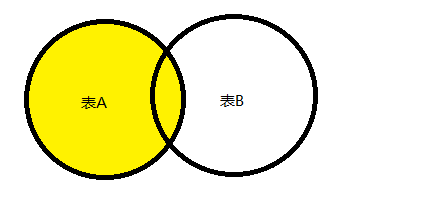

右连接和左连接非常相似，选择表B中的所有记录，以及表A中满足连接条件的记录（如果有的话），下图通过图解的方式解释了右连接：
